In [2]:
#importing libraries

import matplotlib.pyplot as plt

import numpy as np

import time

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD

C:\Users\Owner\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#dowload the MNIST data
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

In [4]:
#examining dataset
print(test_X.shape)
print(train_X.shape)
print(test_y.shape)
print(train_y.shape)

(10000, 28, 28)
(60000, 28, 28)
(10000,)
(60000,)


In [5]:
#viewing unique labels
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
#defining the image classes so not just numbers as above
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
#feature scaling colours from 0-255 to 0-1
train_X = train_X/255.0
test_X = test_X/255.0

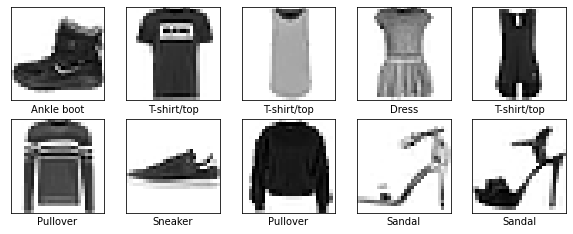

In [8]:
#Showing the first 10 images
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i]])
plt.show()

## Simple Neural Network

In [9]:
#creating one hidden layer with 128 nodes and output layer with 10 nodes
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(128, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')
])

In [10]:
#backpropagation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
#training the model
model.fit(train_X, train_y, epochs=10)

Epoch 1/10


C:\Users\Owner\anaconda3\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 21s 8ms/step - loss: 0.4970 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3730 - accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3374 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3126 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2947 - accuracy: 0.8912
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2800 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2684 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2580 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2498 - accuracy: 0.9056
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2403 - 

In [12]:
#evaluating model
loss, acc = model.evaluate(test_X, test_y, verbose = 1)
print('\\nTest accuracy: ', acc)

313/313 [==============================] - 3s 3ms/step - loss: 0.3964 - accuracy: 0.8669
\nTest accuracy:  0.8669000267982483


## CNN_Model_One

In [13]:
def cnn_model_one():
    
    #creating a sequential instance to add layers to model
    cnn_model = Sequential()
    
    #first convolutional layer
    cnn_model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    #first pooling layer
    cnn_model.add(MaxPooling2D((2,2), strides = 2))
    
    #second convolutional layer
    cnn_model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
    #second pooling layer
    cnn_model.add(MaxPooling2D((2,2), strides = 2))
    
    #third convolutional layer
    cnn_model.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
    #third pooling layer
    cnn_model.add(MaxPooling2D((2,2), strides = 2))
    
    #Flatten and connect layers
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation = 'relu'))
    
    #Fully connected layer of 10 to refelct 10 labels and softmax activation
    cnn_model.add(Dense(10, activation = 'softmax'))
    
    return cnn_model

In [14]:
cnn_model_one = cnn_model_one()

# set up model optimizer, loss function, and accuracy
#adam - adaptive moment estimation
cnn_model_one.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

cnn_model_one.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)        

In [16]:
#training the model
t0_one=time.time()
train_model_one = cnn_model_one.fit(train_X, train_y, epochs=10, validation_split=0.33)
print("Training time:", time.time()-t0_one)

Epoch 1/10
1257/1257 [==============================] - 61s 46ms/step - loss: 0.4909 - sparse_categorical_accuracy: 0.8206 - val_loss: 0.3426 - val_sparse_categorical_accuracy: 0.8779
Epoch 2/10
1257/1257 [==============================] - 82s 65ms/step - loss: 0.3096 - sparse_categorical_accuracy: 0.8875 - val_loss: 0.3155 - val_sparse_categorical_accuracy: 0.8841
Epoch 3/10
1257/1257 [==============================] - 61s 48ms/step - loss: 0.2595 - sparse_categorical_accuracy: 0.9034 - val_loss: 0.2501 - val_sparse_categorical_accuracy: 0.9097
Epoch 4/10
1257/1257 [==============================] - 55s 43ms/step - loss: 0.2236 - sparse_categorical_accuracy: 0.9182 - val_loss: 0.2587 - val_sparse_categorical_accuracy: 0.9050
Epoch 5/10
1257/1257 [==============================] - 57s 45ms/step - loss: 0.1940 - sparse_categorical_accuracy: 0.9270 - val_loss: 0.2394 - val_sparse_categorical_accuracy: 0.9136
Epoch 6/10
1257/1257 [==============================] - 60s 48ms/step - loss: 0.

In [17]:
#test the model
loss, acc = cnn_model_one.evaluate(test_X, test_y, verbose = 1)
print('\nTest accuracy: ', acc)
print('\nTest loss: ', loss)

313/313 [==============================] - 3s 10ms/step - loss: 0.2834 - sparse_categorical_accuracy: 0.9124

Test accuracy:  0.9124000072479248

Test loss:  0.2833966016769409


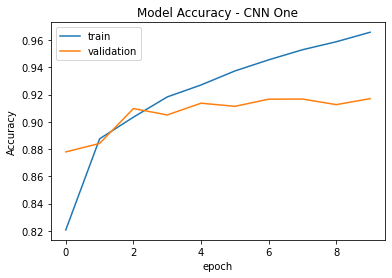

In [18]:
#plotting the accuracy
plt.plot(train_model_one.history['sparse_categorical_accuracy'])
plt.plot(train_model_one.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy - CNN One')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

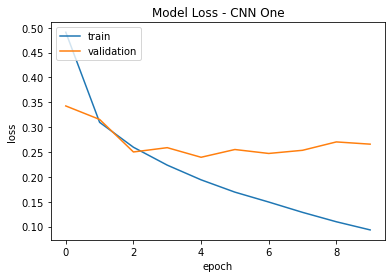

In [19]:
#plotting the loss
plt.plot(train_model_one.history['loss'])
plt.plot(train_model_one.history['val_loss'])
plt.title('Model Loss - CNN One')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## CNN_Model_One - Epoch Increase

In [21]:
#training the model
t0_one_epoch=time.time()
train_model_one_epoch = cnn_model_one.fit(train_X, train_y, epochs=30, validation_split=0.33)
print("Training time:", time.time()-t0_one_epoch)

Epoch 1/30
1257/1257 [==============================] - 71s 57ms/step - loss: 0.0801 - sparse_categorical_accuracy: 0.9698 - val_loss: 0.2859 - val_sparse_categorical_accuracy: 0.9151
Epoch 2/30
1257/1257 [==============================] - 60s 47ms/step - loss: 0.0687 - sparse_categorical_accuracy: 0.9743 - val_loss: 0.3047 - val_sparse_categorical_accuracy: 0.9185
Epoch 3/30
1257/1257 [==============================] - 58s 46ms/step - loss: 0.0628 - sparse_categorical_accuracy: 0.9763 - val_loss: 0.3366 - val_sparse_categorical_accuracy: 0.9186
Epoch 4/30
1257/1257 [==============================] - 53s 42ms/step - loss: 0.0576 - sparse_categorical_accuracy: 0.9780 - val_loss: 0.3603 - val_sparse_categorical_accuracy: 0.9172
Epoch 5/30
1257/1257 [==============================] - 64s 51ms/step - loss: 0.0485 - sparse_categorical_accuracy: 0.9817 - val_loss: 0.3753 - val_sparse_categorical_accuracy: 0.9207
Epoch 6/30
1257/1257 [==============================] - 56s 44ms/step - loss: 0.

In [22]:
#test the model
loss, acc = cnn_model_one.evaluate(test_X, test_y, verbose = 1)
print('\nTest accuracy: ', acc)
print('\nTest loss: ', loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.8357 - sparse_categorical_accuracy: 0.9094

Test accuracy:  0.9093999862670898

Test loss:  0.83566814661026


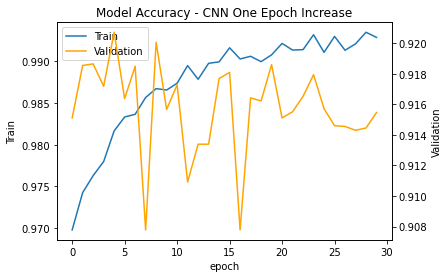

In [23]:
#plotting the accuracy
fig, ax1 = plt.subplots()

ax1.plot(train_model_one_epoch.history['sparse_categorical_accuracy'], label='Train')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Train')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(train_model_one_epoch.history['val_sparse_categorical_accuracy'], label='Validation', color='orange')
ax2.set_ylabel('Validation')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Model Accuracy - CNN One Epoch Increase')
plt.show()

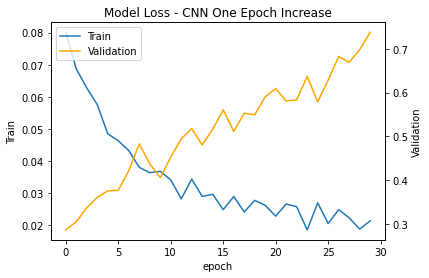

In [24]:
# plotting the loss
fig, ax1 = plt.subplots()

ax1.plot(train_model_one_epoch.history['loss'], label='Train')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Train')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(train_model_one_epoch.history['val_loss'], label='Validation', color='orange')
ax2.set_ylabel('Validation')
ax2.tick_params(axis='y')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Model Loss - CNN One Epoch Increase')
plt.show()

## CNN_Model_Two

In [25]:
def cnn_model_two():
    
    #creating a sequential instance to add layers to model
    cnn_model_two = Sequential()
    
    #first convolutional layer
    cnn_model_two.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    #first pooling layer
    cnn_model_two.add(MaxPooling2D((2,2), strides = 2))
    
    #second convolutional layer
    cnn_model_two.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
    #second pooling layer
    cnn_model_two.add(MaxPooling2D((2,2), strides = 2))
    
    #third convolutional layer
    cnn_model_two.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
    #third pooling layer
    cnn_model_two.add(MaxPooling2D((2,2), strides = 2))
    
    #Flatten and connect layers
    cnn_model_two.add(Flatten())
    cnn_model_two.add(Dense(128, activation = 'relu'))
    cnn_model_two.add(Dense(128, activation = 'relu'))
    cnn_model_two.add(Dense(128, activation = 'relu'))
    cnn_model_two.add(Dense(128, activation = 'relu'))
    cnn_model_two.add(Dense(128, activation = 'relu'))
    cnn_model_two.add(Dense(128, activation = 'relu'))
    
    #Fully connected layer of 10 to refelct 10 labels and softmax activation
    cnn_model_two.add(Dense(10, activation = 'softmax'))
    
    return cnn_model_two

In [26]:
cnn_model_two = cnn_model_two()

# set up model optimizer, loss function, and accuracy
#adam - adaptive moment estimation
cnn_model_two.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

cnn_model_two.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 128)        

In [27]:
#training the model
t0_two=time.time()
train_model_two = cnn_model_two.fit(train_X, train_y, epochs=10, validation_split=0.33)
print("Training time:", time.time()-t0_two)

Epoch 1/10
1257/1257 [==============================] - 61s 46ms/step - loss: 0.5867 - sparse_categorical_accuracy: 0.7766 - val_loss: 0.4355 - val_sparse_categorical_accuracy: 0.8469
Epoch 2/10
1257/1257 [==============================] - 62s 49ms/step - loss: 0.3480 - sparse_categorical_accuracy: 0.8749 - val_loss: 0.3295 - val_sparse_categorical_accuracy: 0.8793
Epoch 3/10
1257/1257 [==============================] - 65s 52ms/step - loss: 0.2912 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.2930 - val_sparse_categorical_accuracy: 0.8982
Epoch 4/10
1257/1257 [==============================] - 78s 62ms/step - loss: 0.2535 - sparse_categorical_accuracy: 0.9084 - val_loss: 0.2793 - val_sparse_categorical_accuracy: 0.9038
Epoch 5/10
1257/1257 [==============================] - 59s 47ms/step - loss: 0.2271 - sparse_categorical_accuracy: 0.9185 - val_loss: 0.2477 - val_sparse_categorical_accuracy: 0.9119
Epoch 6/10
1257/1257 [==============================] - 53s 42ms/step - loss: 0.

In [28]:
#test the model
loss, acc = cnn_model_two.evaluate(test_X, test_y, verbose = 1)
print('\nTest accuracy: ', acc)
print('\nTest loss: ', loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.3265 - sparse_categorical_accuracy: 0.9104

Test accuracy:  0.9103999733924866

Test loss:  0.32648545503616333


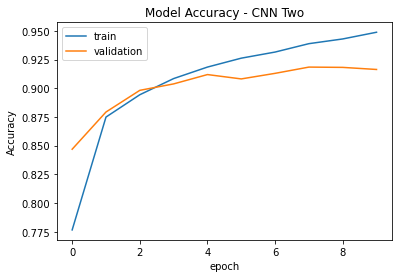

In [29]:
#plotting the accuracy
plt.plot(train_model_two.history['sparse_categorical_accuracy'])
plt.plot(train_model_two.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy - CNN Two')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

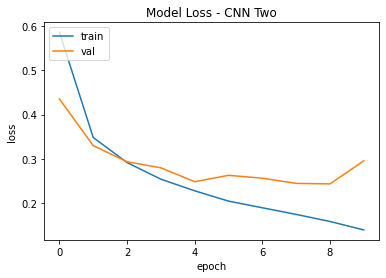

In [30]:
#plotting the loss
plt.plot(train_model_two.history['loss'])
plt.plot(train_model_two.history['val_loss'])
plt.title('Model Loss - CNN Two')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## CNN_MODEL_THREE

In [31]:
def cnn_model_three():
    
    #creating a sequential instance to add layers to model
    cnn_model_three = Sequential()
    
    #first convolutional layer
    cnn_model_three.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    #first pooling layer
    cnn_model_three.add(MaxPooling2D((2,2), strides = 2))
    #add dropout
    model.add(Dropout(0.3)) 
    
    #second convolutional layer
    cnn_model_three.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
    #second pooling layer
    cnn_model_three.add(MaxPooling2D((2,2), strides = 2))
    #add dropout
    model.add(Dropout(0.3)) 
    
    #third convolutional layer
    cnn_model_three.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
    #third pooling layer
    cnn_model_three.add(MaxPooling2D((2,2), strides = 2))
    #add dropout
    model.add(Dropout(0.3)) 
    
    #Flatten and connect layers
    cnn_model_three.add(Flatten())
    cnn_model_three.add(Dense(128, activation = 'relu'))
    cnn_model_three.add(Dense(128, activation = 'relu'))
    cnn_model_three.add(Dense(128, activation = 'relu'))
    cnn_model_three.add(Dense(128, activation = 'relu'))
    cnn_model_three.add(Dense(128, activation = 'relu'))
    cnn_model_three.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.3)) 
    
    #Fully connected layer of 10 to refelct 10 labels and softmax activation
    cnn_model_three.add(Dense(10, activation = 'softmax'))
    
    return cnn_model_three

In [32]:
cnn_model_three = cnn_model_three()

# set up model optimizer, loss function, and accuracy
#adam - adaptive moment estimation
cnn_model_three.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

cnn_model_three.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 3, 3, 128)        

In [33]:
#training the model
t0_three = time.time()
train_model_three = cnn_model_three.fit(train_X, train_y, epochs=10, validation_split=0.33)
print("Training time:", time.time()-t0_three)

Epoch 1/10
1257/1257 [==============================] - 74s 56ms/step - loss: 0.5858 - sparse_categorical_accuracy: 0.7784 - val_loss: 0.4608 - val_sparse_categorical_accuracy: 0.8416
Epoch 2/10
1257/1257 [==============================] - 66s 53ms/step - loss: 0.3538 - sparse_categorical_accuracy: 0.8723 - val_loss: 0.3112 - val_sparse_categorical_accuracy: 0.8888
Epoch 3/10
1257/1257 [==============================] - 63s 50ms/step - loss: 0.2928 - sparse_categorical_accuracy: 0.8947 - val_loss: 0.3458 - val_sparse_categorical_accuracy: 0.8703
Epoch 4/10
1257/1257 [==============================] - 68s 54ms/step - loss: 0.2600 - sparse_categorical_accuracy: 0.9065 - val_loss: 0.2751 - val_sparse_categorical_accuracy: 0.8986
Epoch 5/10
1257/1257 [==============================] - 67s 53ms/step - loss: 0.2306 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.3406 - val_sparse_categorical_accuracy: 0.8909
Epoch 6/10
1257/1257 [==============================] - 56s 44ms/step - loss: 0.

In [34]:
#test the model
loss, acc = cnn_model_three.evaluate(test_X, test_y, verbose = 1)
print('\nTest accuracy: ', acc)
print('\nTest loss: ', loss)

313/313 [==============================] - 4s 11ms/step - loss: 0.2955 - sparse_categorical_accuracy: 0.8994

Test accuracy:  0.899399995803833

Test loss:  0.2954619228839874


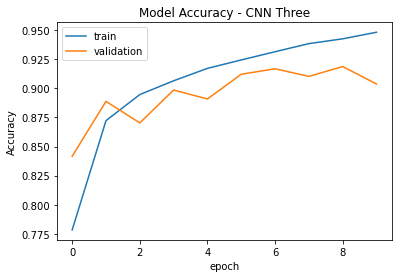

In [35]:
#plotting the accuracy
plt.plot(train_model_three.history['sparse_categorical_accuracy'])
plt.plot(train_model_three.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy - CNN Three')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

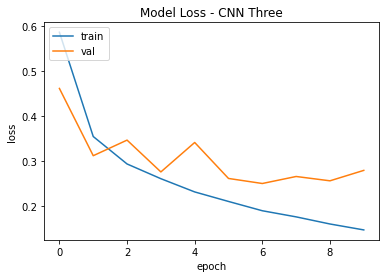

In [36]:
#plotting the loss
plt.plot(train_model_three.history['loss'])
plt.plot(train_model_three.history['val_loss'])
plt.title('Model Loss - CNN Three')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## CNN_Model_Four

In [37]:
def cnn_model_four():
    
    #creating a sequential instance to add layers to model
    cnn_model_four = Sequential()
    
    #first convolutional layer
    cnn_model_four.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28,28,1)))
    #add batch normalization
    cnn_model_four.add(BatchNormalization())
    #first pooling layer
    cnn_model_four.add(MaxPooling2D((2,2), strides = 2))
    
    
    #second convolutional layer
    cnn_model_four.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
    #add batch normalization
    cnn_model_four.add(BatchNormalization())
    #second pooling layer
    cnn_model_four.add(MaxPooling2D((2,2), strides = 2))

    #third convolutional layer
    cnn_model_four.add(Conv2D(128, (3,3), padding='same', activation = 'relu'))
    #add batch normalization
    cnn_model_four.add(BatchNormalization())
    #third pooling layer
    cnn_model_four.add(MaxPooling2D((2,2), strides = 2))

    #Flatten and connect layers
    cnn_model_four.add(Flatten())
    cnn_model_four.add(Dense(128, activation = 'relu'))
    cnn_model_four.add(Dense(128, activation = 'relu'))
    cnn_model_four.add(Dense(128, activation = 'relu'))
    cnn_model_four.add(Dense(128, activation = 'relu'))
    cnn_model_four.add(Dense(128, activation = 'relu'))
    cnn_model_four.add(Dense(128, activation = 'relu'))
    cnn_model_four.add(Dropout(0.5))
    
    #Fully connected layer of 10 to refelct 10 labels and softmax activation
    cnn_model_four.add(Dense(10, activation = 'softmax'))
    
    return cnn_model_four

In [38]:
cnn_model_four = cnn_model_four()

# set up model optimizer, loss function, and accuracy
#adam - adaptive moment estimation
cnn_model_four.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

cnn_model_four.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                      

In [39]:
#training the model
t0_four = time.time()
train_model_four = cnn_model_four.fit(train_X, train_y, epochs=10, validation_split=0.33)
print("Training time:", time.time()-t0_four)

Epoch 1/10
1257/1257 [==============================] - 98s 72ms/step - loss: 0.5141 - sparse_categorical_accuracy: 0.8249 - val_loss: 0.3269 - val_sparse_categorical_accuracy: 0.8827
Epoch 2/10
1257/1257 [==============================] - 88s 70ms/step - loss: 0.3303 - sparse_categorical_accuracy: 0.8872 - val_loss: 0.2985 - val_sparse_categorical_accuracy: 0.8942
Epoch 3/10
1257/1257 [==============================] - 84s 67ms/step - loss: 0.2837 - sparse_categorical_accuracy: 0.9039 - val_loss: 0.3113 - val_sparse_categorical_accuracy: 0.8895
Epoch 4/10
1257/1257 [==============================] - 78s 62ms/step - loss: 0.2518 - sparse_categorical_accuracy: 0.9144 - val_loss: 0.3029 - val_sparse_categorical_accuracy: 0.9043
Epoch 5/10
1257/1257 [==============================] - 96s 76ms/step - loss: 0.2323 - sparse_categorical_accuracy: 0.9220 - val_loss: 0.2840 - val_sparse_categorical_accuracy: 0.9103
Epoch 6/10
1257/1257 [==============================] - 122s 97ms/step - loss: 0

In [40]:
#test the model
loss, acc = cnn_model_four.evaluate(test_X, test_y, verbose = 1)
print('\nTest accuracy: ', acc)
print('\nTest loss: ', loss)

313/313 [==============================] - 6s 20ms/step - loss: 0.3250 - sparse_categorical_accuracy: 0.9149

Test accuracy:  0.914900004863739

Test loss:  0.3249828517436981


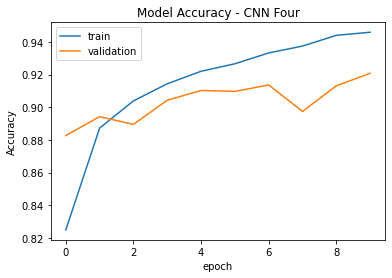

In [41]:
#plotting the accuracy
plt.plot(train_model_four.history['sparse_categorical_accuracy'])
plt.plot(train_model_four.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy - CNN Four')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

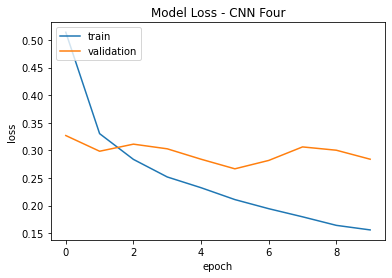

In [42]:
#plotting the loss
plt.plot(train_model_four.history['loss'])
plt.plot(train_model_four.history['val_loss'])
plt.title('Model Loss - CNN Four')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#sources: https://anna-shi.medium.com/can-computers-recognize-shirts-from-sandals-d91b451d9dad